# Import Statements

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [243]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 1. Bar Chart: Count of individuals by smoking status

In [246]:
def plot_bar_chart(data):
    sns.countplot(x='smoker', data=data, palette='coolwarm')
    plt.title('Count of Individuals by Smoking Status\n',fontweight='bold', fontsize=16)
    plt.xlabel('Smoking Status', fontweight='bold',fontsize=14)
    plt.ylabel('Count',fontweight='bold', fontsize=14)
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                           textcoords='offset points')
    plt.tight_layout()
    plt.savefig('bar_chart.png',dpi=1000)
    plt.show()
    

# 2. Scatter Plot: Age vs Charges with regression line and confidence interval

In [249]:
def scatter_with_fit(data):
    X = data['age'].values.reshape(-1, 1)
    y = data['charges']
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)

    plt.scatter(data['age'], data['charges'], alpha=0.5, label='Actual Data')
    plt.plot(data['age'], predictions, color='red', label='Fitted Line')
    
    # Add confidence interval
    residuals = y - predictions
    std_error = np.std(residuals)
    plt.fill_between(data['age'], predictions - 2 * std_error, predictions + 2 * std_error, 
                     color='red', alpha=0.2, label='95% Confidence Interval')
    
    plt.title('Age vs Charges with Fitted Line\n',fontweight='bold', fontsize=16)
    plt.xlabel('Age',fontweight='bold', fontsize=14)
    plt.ylabel('Charges',fontweight='bold', fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.savefig('scatter_plot.png',dpi=1000)
    plt.show()
    

# 3. Violin Plot: BMI distribution by smoking status

In [277]:
def plot_violin(data):
    sns.violinplot(x='smoker', y='bmi', data=data, palette='muted')
    plt.title('BMI Distribution by Smoking Status\n', fontweight='bold',fontsize=16)
    plt.xlabel('Smoking Status',fontweight='bold', fontsize=14)
    plt.ylabel('BMI',fontweight='bold', fontsize=14)
    plt.tight_layout()
    plt.savefig('violin_plot.png',dpi=1000)
    plt.show()
    


# 4. K-Means Clustering and Silhouette Plot: Age and Charges

In [280]:
def kmeans_and_silhouette(data, n_clusters=3):
    kmeans_data = data[['age', 'charges']]
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(kmeans_data)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)

    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    print(f'Silhouette Score: {silhouette_avg:.2f}')

    # Back-scale cluster centers for plotting
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

    plt.scatter(data['age'], data['charges'], c=cluster_labels, cmap='viridis', alpha=0.7, label='Clusters')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', label='Centroids')
    plt.title(f'K-Means Clustering (k={n_clusters})\n', fontweight='bold',fontsize=16)
    plt.xlabel('Age', fontweight='bold',fontsize=14)
    plt.ylabel('Charges',fontweight='bold', fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.savefig('kmeans_plot.png',dpi=1000)
    plt.show()
    

    # Return kmeans, cluster_centers, and scaler
    return kmeans, cluster_centers, scaler

# Plot elbow curve for optimal k

In [283]:
def plot_elbow_curve(data):
    kmeans_data = data[['age', 'charges']]
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(kmeans_data)

    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        distortions.append(kmeans.inertia_)

    plt.plot(K, distortions, 'bx-')
    plt.title('Elbow Method for Optimal k\n',fontweight='bold', fontsize=16)
    plt.xlabel('Number of clusters (k)',fontweight='bold', fontsize=14)
    plt.ylabel('Distortion',fontweight='bold', fontsize=14)
    plt.tight_layout()
    plt.savefig('elbow_plot.png',dpi=1000)
    plt.show()
    

# Predict cluster membership for new points

In [286]:
def predict_clusters(kmeans, cluster_centers, scaler, data, new_points):
    new_points_scaled = scaler.transform(new_points)
    predictions = kmeans.predict(new_points_scaled)
    new_points_unscaled = scaler.inverse_transform(new_points)

    plt.scatter(data['age'], data['charges'], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Original Clusters')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', label='Centroids')
    
    for i, point in enumerate(new_points_unscaled):
        plt.scatter(point[0], point[1], c='blue', marker='x', label=f'New Point {i+1}' if i == 0 else "")

    plt.title('Cluster Predictions for New Points\n',fontweight='bold', fontsize=16)
    plt.xlabel('Age',fontweight='bold', fontsize=14)
    plt.ylabel('Charges',fontweight='bold', fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.savefig('prediction_plot.png',dpi=1000)
    plt.show()
    


# Function Calls

C:\Users\Sutharshan\AppData\Local\Temp\ipykernel_17464\2716252177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=data, palette='coolwarm')


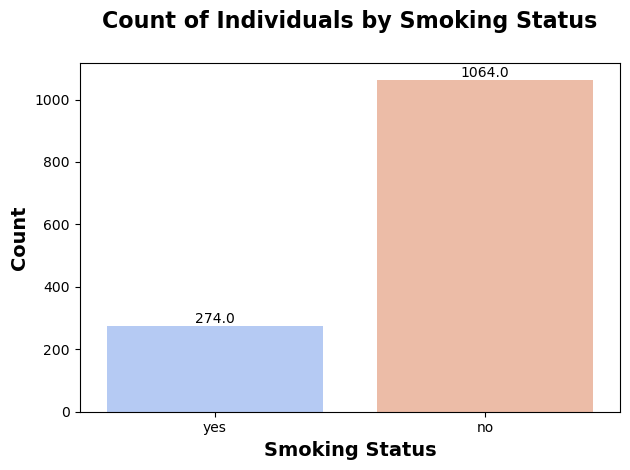

In [289]:
plot_bar_chart(data)

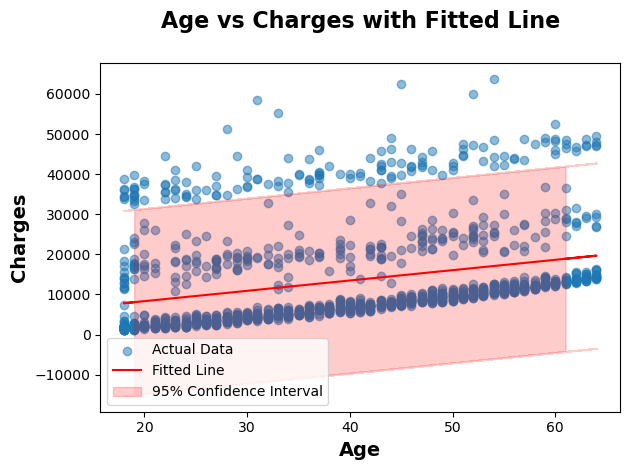

In [291]:
scatter_with_fit(data)

C:\Users\Sutharshan\AppData\Local\Temp\ipykernel_17464\189682034.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoker', y='bmi', data=data, palette='muted')


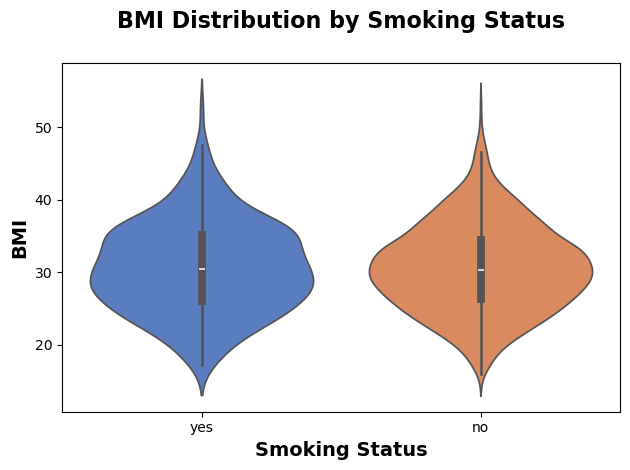

In [293]:
plot_violin(data)

Silhouette Score: 0.52


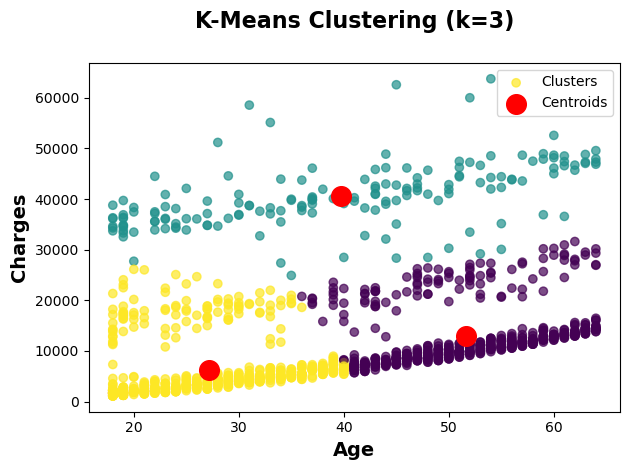

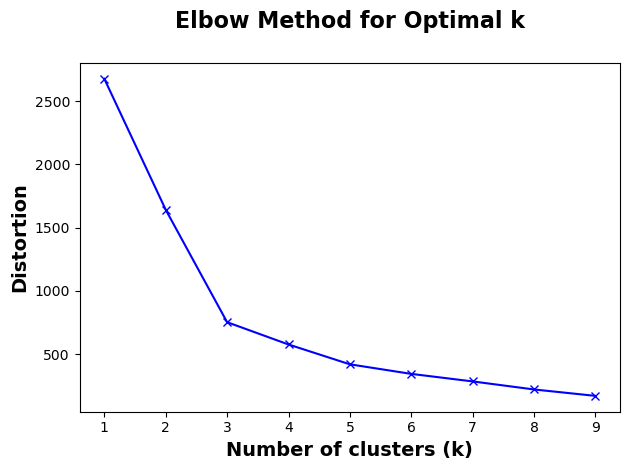

In [295]:
kmeans, cluster_centers, scaler = kmeans_and_silhouette(data, n_clusters=3)
plot_elbow_curve(data)

# Example predictions

F:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


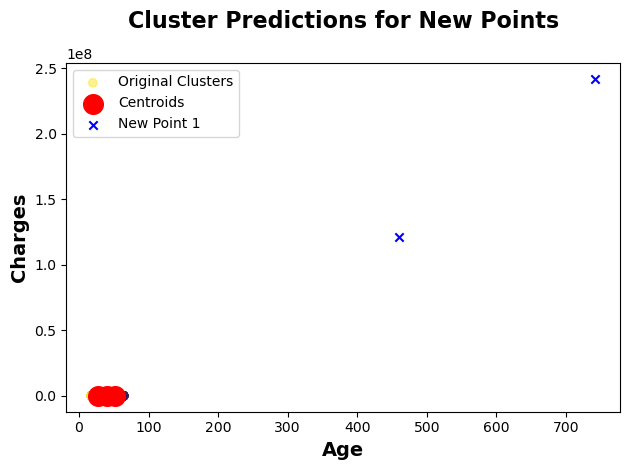

In [298]:
new_points = np.array([[30, 10000], [50, 20000]])
predict_clusters(kmeans, cluster_centers, scaler, data, new_points)
